In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AE0D-904C

 Directory of C:\Users\Suhas\Desktop\data science

01-02-2023  08:53    <DIR>          .
29-01-2023  07:32    <DIR>          ..
01-02-2023  08:49    <DIR>          .ipynb_checkpoints
29-01-2023  16:56           207,047 Beml and glaxo.ipynb
28-01-2023  10:44           103,983 BEML.csv
01-02-2023  08:52             3,527 Cars.csv
28-01-2023  10:47            97,587 GLAXO .csv
30-01-2023  18:25             9,058 hypothesis Testing.ipynb
30-01-2023  17:22            45,567 introduction to python c1.ipynb
31-01-2023  15:54           171,210 LinearRegression.ipynb
26-01-2023  15:45            27,823 loops, map & filter, exception handling,recursion(c2).ipynb
27-01-2023  21:45           406,383 matplotlib,seaborn.ipynb
31-01-2023  11:18             1,240 NewspaperData.csv
27-01-2023  17:54            69,705 numpy.ipynb
27-01-2023  12:28           290,219 Pandas c3.ipynb
01-02-2023  08:52           237,799 Toyota.xlsx
01-02-2023

In [3]:
cars = pd.read_csv("Cars.csv")

In [4]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Correltion Matrix

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<AxesSubplot:>

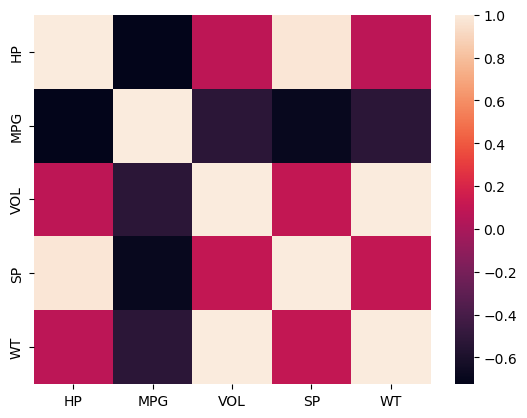

In [77]:
sns.heatmap(cars.corr())

# Scatterplot between variables  along with histograms

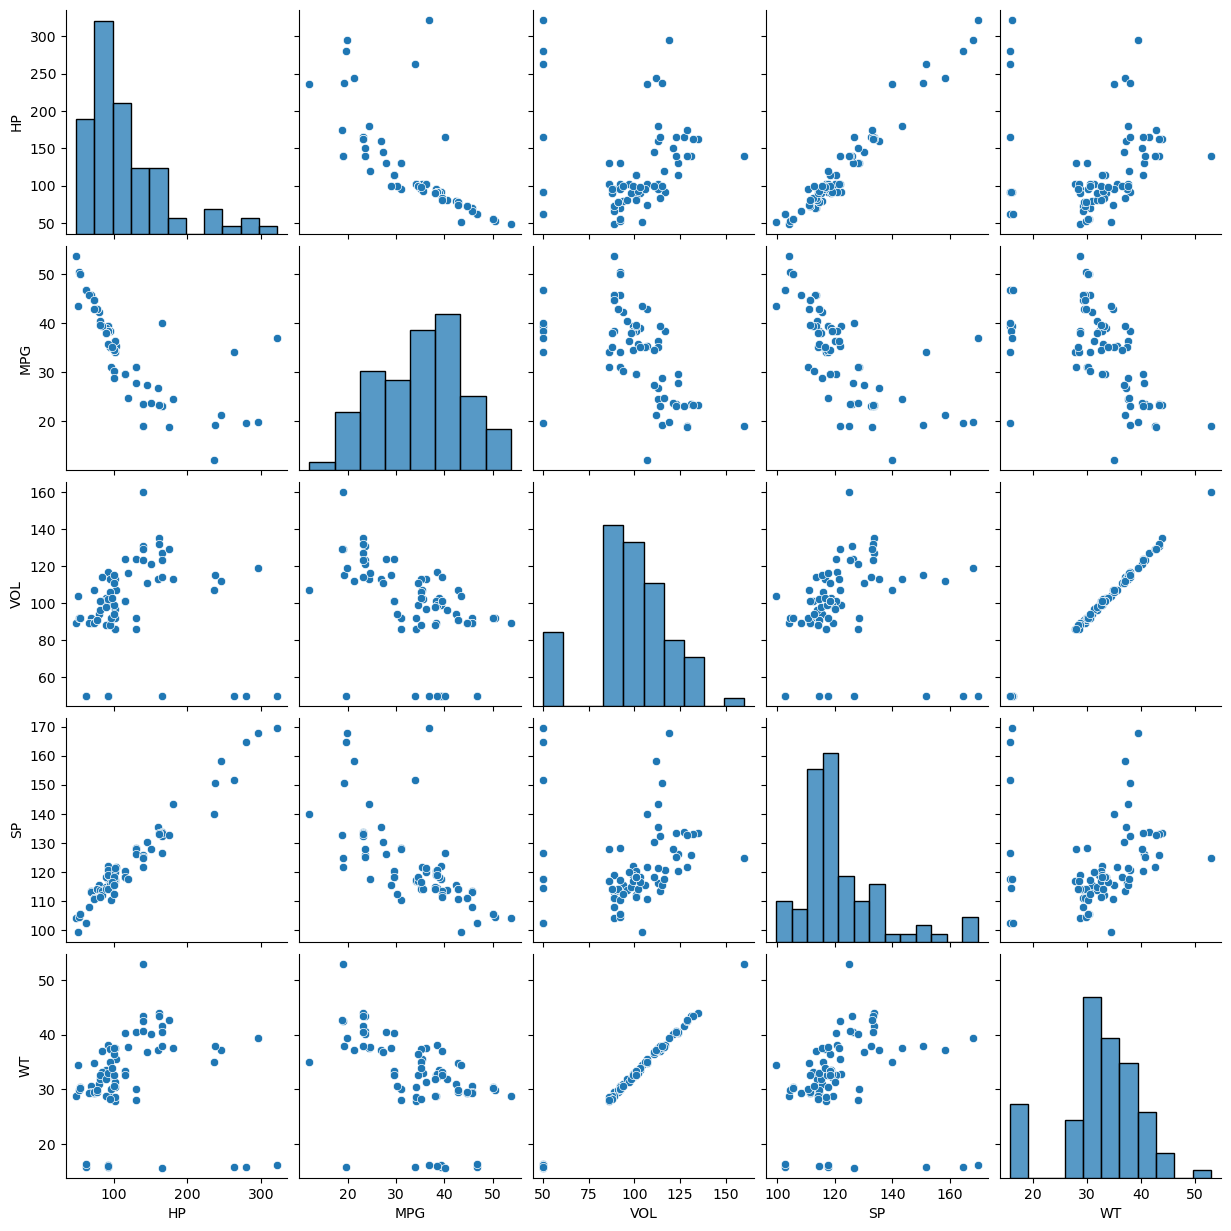

In [9]:
sns.pairplot(cars)

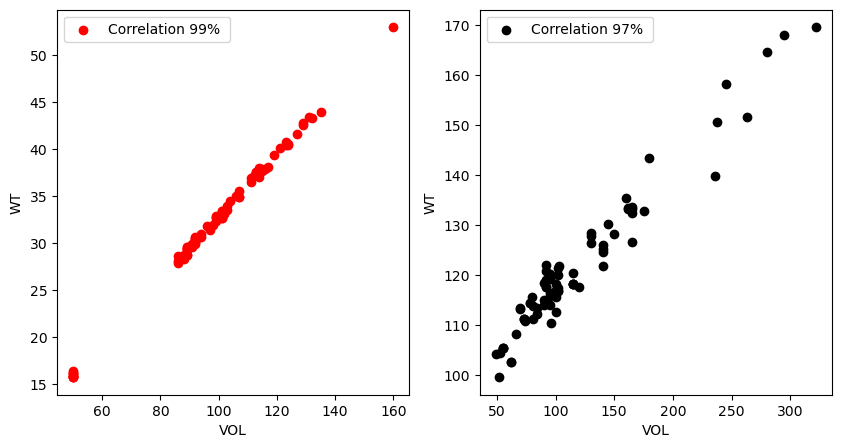

In [22]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(cars["VOL"],cars["WT"],color = "red" ,label = "Correlation 99% ")
plt.xlabel("VOL")
plt.ylabel("WT")
plt.legend(loc = "best")

plt.subplot(1,2,2)
plt.scatter(cars["HP"],cars["SP"],color = "black" ,label = "Correlation 97% ")
plt.xlabel("VOL")
plt.ylabel("WT")
plt.legend(loc = "best")

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [24]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Preparing a model

In [25]:
#building a model
model = smf.ols("MPG~WT+VOL+SP+HP",data = cars).fit()

In [26]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [28]:
model.rsquared

0.7705372737359842

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.54e-23
Time:                        09:10:58   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [36]:
rsq_hp = smf.ols('HP~WT+VOL+SP' , data = cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data = cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~HP+WT+SP',data = cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~HP+VOL+WT',data = cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

#sorting vif values in data frame
d1 = {'Variables': ['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [37]:
'''X1,X2,X3,X4
X2,X3 high VIF
x4,x1 low vif
--> x2,x1,x4
--> x3,x1,x4'''

'X1,X2,X3,X4\nX2,X3 high VIF\nx4,x1 low vif\n--> x2,x1,x4\n--> x3,x1,x4'

In [48]:
'''X1,X2,X3,X4,x5
X2,X3,x1 high VIF
x4,x5 low vif
--> x1,x4,x5
--> x2,x4,x5
--> x3,x4,x5
--> x1,x2,x4,x5
--> x3,x1,x4,x5
--> x2,x3,x4,x5
--> x4,x5'''
# p-value should be on the lower side and we should have r2 on higher side

'X1,X2,X3,X4,x5\nX2,X3,x1 high VIF\nx4,x5 low vif\n--> x1,x4,x5\n--> x2,x4,x5\n--> x3,x4,x5\n--> x1,x2,x4,x5\n--> x3,x1,x4,x5\n--> x2,x3,x4,x5\n--> x4,x5'

# treatment for multicollinearity

In [50]:
model1 = smf.ols('MPG~VOL+HP',data = cars).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           2.98e-24
Time:                        09:51:02   Log-Likelihood:                -237.33
No. Observations:                  81   AIC:                             480.7
Df Residuals:                      78   BIC:                             487.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5864      2.506     26.574      0.000      61.598      71.575
VOL           -0.1948      0.023     -8.389      0.000      -0.241      -0.149
HP            -0.1100      0.009    -12.135      0.000      -0.128      -0.092
==============================================================================
Omnibus:                        4.802   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.006
Skew:                           0.482   Prob(JB):                        0.135
Kurtosis:                       3.506   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model2 = smf.ols('MPG~WT+HP',data = cars).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           3.81e-24
Time:                        09:52:40   Log-Likelihood:                -237.58
No. Observations:                  81   AIC:                             481.2
Df Residuals:                      78   BIC:                             488.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0838      2.467     26.784      0.000      61.172      70.996
WT            -0.5777      0.069     -8.334      0.000      -0.716      -0.440
HP            -0.1101      0.009    -12.109      0.000      -0.128      -0.092
==============================================================================
Omnibus:                        4.895   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.101
Skew:                           0.485   Prob(JB):                        0.129
Kurtosis:                       3.522   Cond. No.                         642.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model3 = smf.ols('MPG~SP+HP',data = cars).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     44.45
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.31e-13
Time:                        09:52:42   Log-Likelihood:                -262.77
No. Observations:                  81   AIC:                             531.5
Df Residuals:                      78   BIC:                             538.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0209     20.495      1.270      0.208     -14.782      66.824
SP             0.2364      0.219      1.078      0.285      -0.200       0.673
HP            -0.1731      0.054     -3.178      0.002      -0.282      -0.065
==============================================================================
Omnibus:                       27.260   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.523
Skew:                           1.214   Prob(JB):                     1.45e-12
Kurtosis:                       6.204   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model4 = smf.ols('MPG~VOL+HP+WT',data = cars).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     77.69
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           3.15e-23
Time:                        09:52:43   Log-Likelihood:                -237.16
No. Observations:                  81   AIC:                             482.3
Df Residuals:                      77   BIC:                             491.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.2967      2.819     23.870      0.000      61.683      72.911
VOL           -0.5204      0.583     -0.893      0.375      -1.681       0.640
HP            -0.1099      0.009    -12.066      0.000      -0.128      -0.092
WT             0.9697      1.734      0.559      0.578      -2.484       4.423
==============================================================================
Omnibus:                        4.819   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.024
Skew:                           0.489   Prob(JB):                        0.134
Kurtosis:                       3.486   Cond. No.                         950.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model5 = smf.ols('MPG~WT+SP+HP',data = cars).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.81e-24
Time:                        09:52:43   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
SP             0.4078      0.156      2.609      0.011       0.097       0.719
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
model6 = smf.ols('MPG~VOL+HP+SP',data = cars).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.56e-24
Time:                        09:52:44   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model7 = smf.ols('MPG~HP',data = cars).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     87.55
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.96e-14
Time:                        09:52:44   Log-Likelihood:                -263.37
No. Observations:                  81   AIC:                             530.7
Df Residuals:                      79   BIC:                             535.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0392      1.616     29.722      0.000      44.822      51.256
HP            -0.1159      0.012     -9.357      0.000      -0.141      -0.091
==============================================================================
Omnibus:                       20.653   Durbin-Watson:                   1.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.053
Skew:                           0.949   Prob(JB):                     9.00e-09
Kurtosis:                       5.716   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# we are critisizing the best model based on 3 criteria - coefficient r^2(high) ans p value(low)
# model 1 is best


# Residual Analysis

In [58]:
#excel -> df. --> csv

# Test for Normality of Residuals(Q-Q Plot)

In [59]:
import statsmodels.api as sm

In [60]:
# if the points and the line are almost coinciding then errors are comming from the normal distribution 

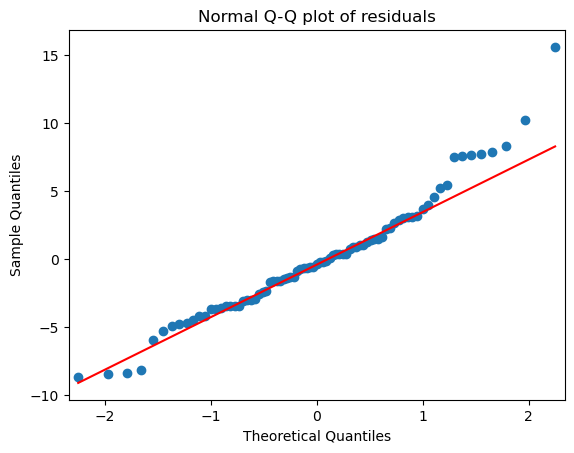

In [62]:
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual for Homoscedasticity

In [66]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

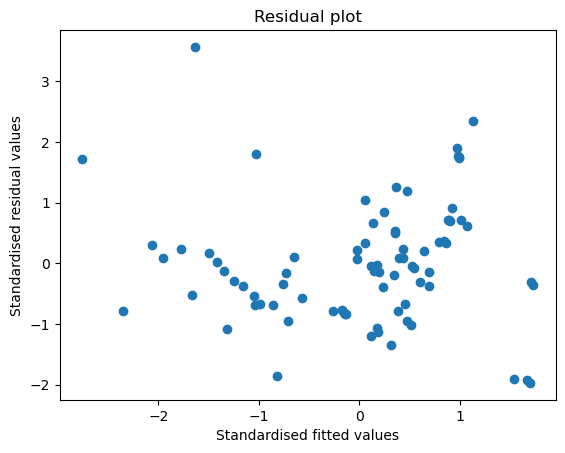

In [71]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual plot")
plt.xlabel("Standardised fitted values")
plt.ylabel("Standardised residual values")
plt.show()

# Residual(errors) vs Regression(features)

eval_env: 1


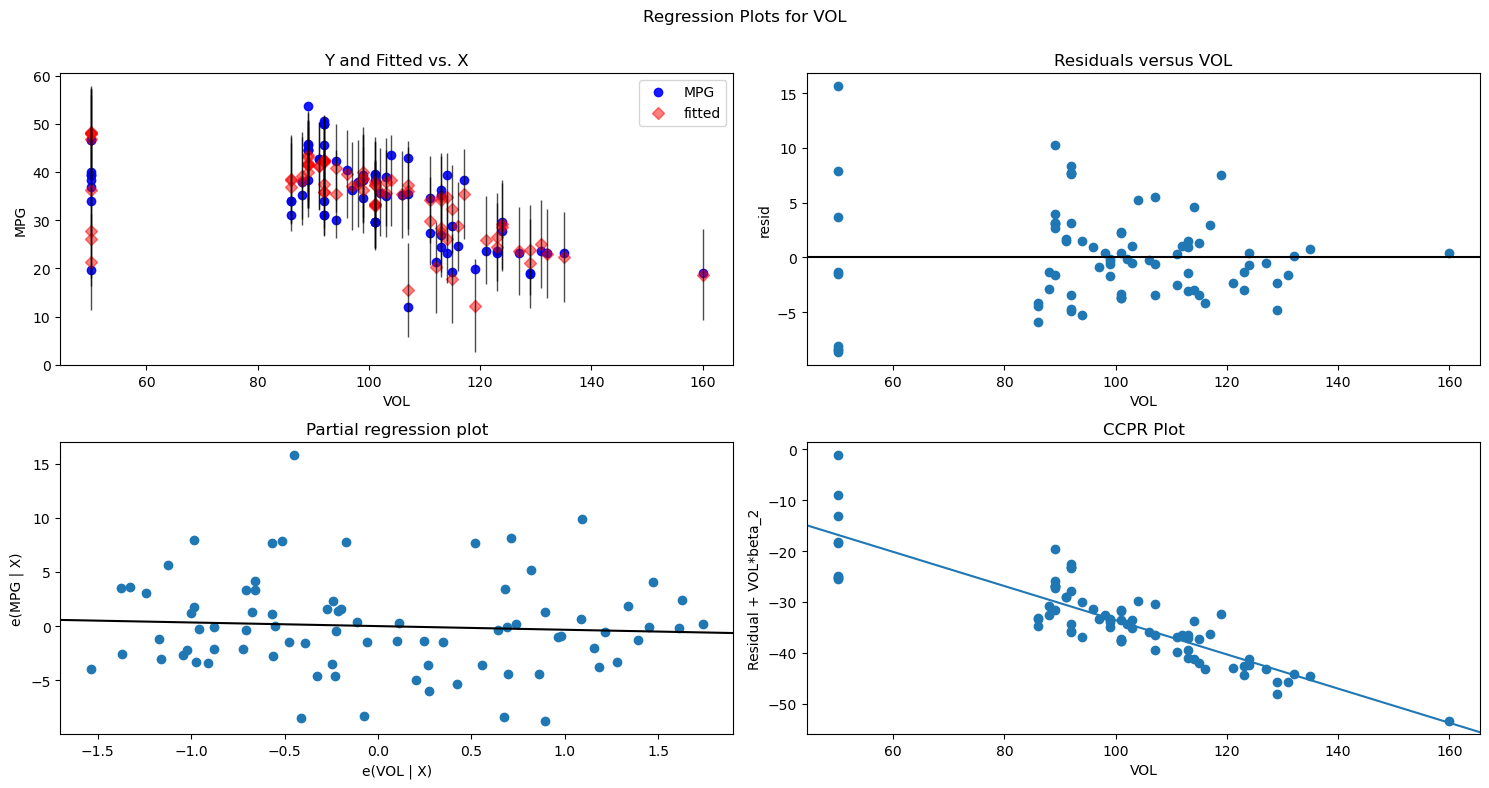

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"VOL",fig = fig)
plt.show()

eval_env: 1


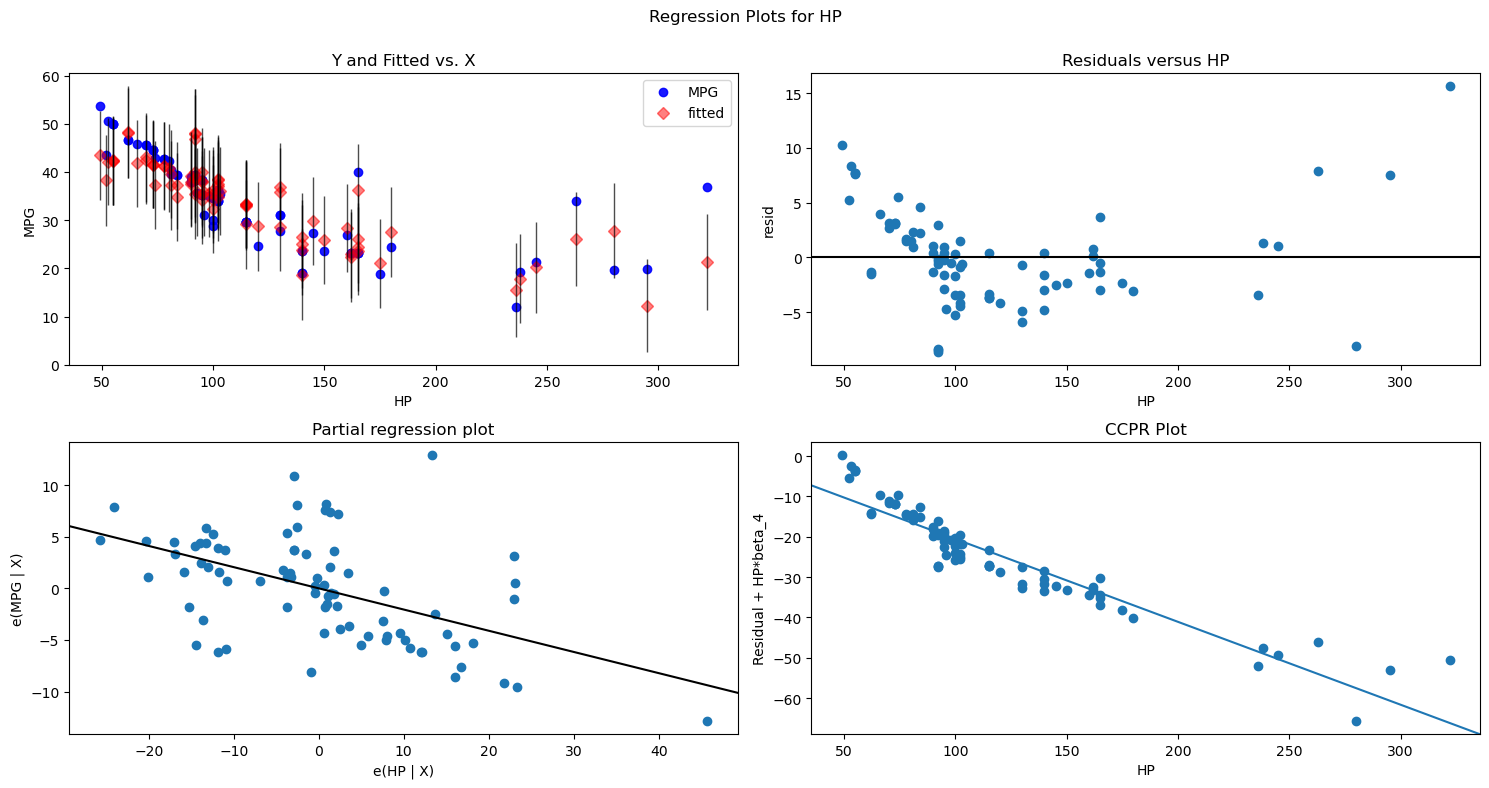

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP",fig = fig)
plt.show()

# Model Deletion Diagnostics
Detecting influencers/Outliers
Cook's Distance

In [81]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

In [83]:
k = 2
n = 81
3*(k+1)/n

0.1111111111111111

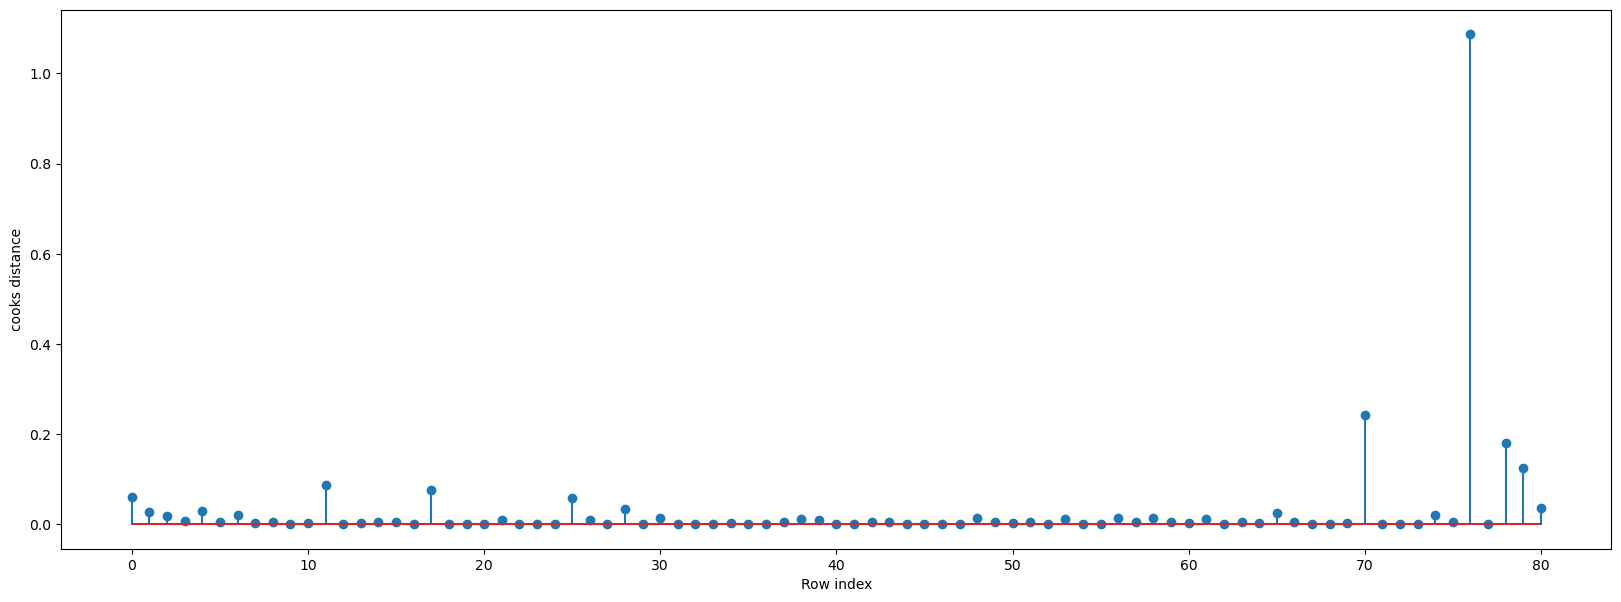

In [87]:
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [88]:
(np.argmax(c),np.max(c))

(76, 1.0865193998179823)

In [89]:
np.where(c>0.111)

(array([70, 76, 78, 79], dtype=int64),)

# Improving the Model

In [90]:
cars_new = pd.read_csv("Cars.csv")

In [91]:
cars1 =cars_new.drop(cars_new.index[[70,76,78,79]],axis = 0).reset_index()

In [92]:
cars1 = cars1.drop(['index'],axis = 1)

In [93]:
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


# Build model

In [94]:
final_ml_v = smf.ols('MPG~HP+VOL',data = cars1).fit()

In [97]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8438644043815173, 419.74317116654095)

In [95]:
final_ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           1.44e-30
Time:                        11:31:44   Log-Likelihood:                -206.87
No. Observations:                  77   AIC:                             419.7
Df Residuals:                      74   BIC:                             426.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.0632      2.080     31.287      0.000      60.920      69.207
HP            -0.1613      0.011    -14.422      0.000      -0.184      -0.139
VOL           -0.1273      0.023     -5.567      0.000      -0.173      -0.082
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.357
Skew:                           0.322   Prob(JB):                        0.507
Kurtosis:                       3.097   Cond. No.                         770.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
final_ml_v.predict([[]])